In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/acthach/Desktop/Summer proj/spotify_topsongs.csv')
df_fav = pd.read_csv('/Users/acthach/Desktop/Summer proj/favorite_songs.csv')

In [3]:
df = pd.concat([df, df_fav], axis=0)
df.shape
df['favorite'].value_counts()

favorite
0    9347
1      50
Name: count, dtype: int64

In [4]:
df.head()

,track_id,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,favorite
0,4xdBrk0nFZaP54vvZj0yx7,184841,90,0.742,0.0187,0.757,0.0000,0.3050,-4.981,0.0421,139.982,4,0
1,6dOtVTDdiauQNBQEDOtlAB,210373,99,0.747,0.2000,0.507,0.0608,0.1170,-10.171,0.0358,104.978,4,0
2,5N3hjp1WNayUPZrA8kJmJP,186365,98,0.669,0.2740,0.586,0.0000,0.1040,-6.073,0.0540,107.071,4,0
3,19RybK6XDbAVpcdxSbZL1o,151739,86,0.804,0.1250,0.957,0.0174,0.1140,-5.452,0.0340,126.035,4,0
4,51eSHglvG1RJXtL3qI5trr,161831,89,0.432,0.1740,0.583,0.0000,0.0933,-4.682,0.0687,181.489,4,0


In [5]:
# Importing required libraries
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier

In [6]:
# Assuming id3_df is your DataFrame
shuffled_df = df.sample(frac=1).reset_index(drop=True)
shuffled_df.head()



,track_id,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,favorite
0,6Fvzozbq17iFwej6D0vuOE,212307,34,0.779,0.00227,0.846,0.625000,0.152,-9.165,0.0543,130.002,4,0
1,1SsadgOE1rru44D5JF9t4E,259647,33,0.658,0.23400,0.538,0.000882,0.098,-8.495,0.0252,110.232,4,0
2,4c11HmomjkYU2wf9maxf17,260431,37,0.264,0.09010,0.795,0.000217,0.243,-4.413,0.0705,153.044,4,0
3,7EF7xI1dSQj1dN1dP3YPPW,204760,47,0.577,0.00239,0.903,0.747000,0.102,-5.659,0.0734,148.068,4,0
4,5VNlUlsA6yZLzDzEctTkst,264200,38,0.406,0.86400,0.248,0.560000,0.157,-15.132,0.0389,105.382,4,0


In [11]:
# Assuming shuffled_df2 is your DataFrame
train_df, test_df = train_test_split(shuffled_df, test_size=0.2, random_state=42)

# `test_size=0.2` means 20% of the data will be used for the test set, and 80% for the train set.
# `random_state=42` ensures reproducibility of the split.


In [12]:
print(f"Train set size: {len(train_df)}")
print(f"Test set size: {len(test_df)}")


Train set size: 7517
Test set size: 1880


In [13]:
train_df.head()

,track_id,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,favorite
8174,6dOtVTDdiauQNBQEDOtlAB,210373,99,0.747,0.20000,0.5070,0.0608,0.117,-10.171,0.0358,104.978,4,0
449,48bo7uexDvAThcRDvEB2W7,255400,57,0.546,0.01330,0.8780,0.0000,0.135,-5.137,0.0525,119.945,4,0
5398,7iNIg7XDEaYECfWD5dJ9Va,189466,67,0.743,0.00389,0.7350,0.0000,0.304,-5.337,0.0382,104.979,4,0
3774,7FwBtcecmlpc1sLySPXeGE,241306,84,0.527,0.01150,0.9420,0.0000,0.188,-5.640,0.0366,148.723,4,0
379,0EXWcVFtynKrWiQqpRDkTh,630893,30,0.145,0.95100,0.0766,0.8820,0.108,-22.100,0.0368,67.461,4,0


In [14]:

X = train_df.drop(columns=['favorite', 'track_id'])
y = train_df.favorite

X.head()


,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
8174,210373,99,0.747,0.20000,0.5070,0.0608,0.117,-10.171,0.0358,104.978,4
449,255400,57,0.546,0.01330,0.8780,0.0000,0.135,-5.137,0.0525,119.945,4
5398,189466,67,0.743,0.00389,0.7350,0.0000,0.304,-5.337,0.0382,104.979,4
3774,241306,84,0.527,0.01150,0.9420,0.0000,0.188,-5.640,0.0366,148.723,4
379,630893,30,0.145,0.95100,0.0766,0.8820,0.108,-22.100,0.0368,67.461,4


In [15]:
y.value_counts()

favorite
0    7476
1      41
Name: count, dtype: int64

In [16]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X, y) 

In [17]:
X_train.head()


,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,210373,99,0.747,0.20000,0.5070,0.0608,0.117,-10.171,0.0358,104.978,4
1,255400,57,0.546,0.01330,0.8780,0.0000,0.135,-5.137,0.0525,119.945,4
2,189466,67,0.743,0.00389,0.7350,0.0000,0.304,-5.337,0.0382,104.979,4
3,241306,84,0.527,0.01150,0.9420,0.0000,0.188,-5.640,0.0366,148.723,4
4,630893,30,0.145,0.95100,0.0766,0.8820,0.108,-22.100,0.0368,67.461,4


In [18]:
y_train.value_counts()

favorite
0    7476
1    7476
Name: count, dtype: int64

Now that the classes in the train set are balanced, the model will be less biased towards a song being a non-favorite and be more accurate on the test data and real life application.

In [19]:
X_test = test_df.drop(columns=['favorite', 'track_id'])
y_test = test_df['favorite']

In [20]:
test_df.head()

,track_id,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,favorite
1618,5P9guvAyGzysMhzMyADHOQ,194626,31,0.338,0.93800,0.2550,0.000493,0.1460,-10.930,0.0364,129.538,4,0
7937,1UUwFKaZ1Z8QPp5sstWltL,167189,62,0.434,0.99200,0.0120,0.896000,0.1060,-35.826,0.0321,107.437,4,0
8648,3XscpxBMDGN1Jhm9ZL3Wsg,459213,31,0.131,0.98800,0.0522,0.905000,0.0844,-19.620,0.0441,67.730,4,0
4058,2RsAajgo0g7bMCHxwH3Sk0,218920,79,0.500,0.00016,0.8240,0.001610,0.0916,-5.846,0.0388,120.125,4,0
3781,6GqqGv8frU7kqzXkm2rewI,190718,68,0.664,0.00839,0.8280,0.000000,0.2940,-6.053,0.0404,103.985,4,0


In [21]:

# Setting test datasets
X_test = test_df.drop(columns=['favorite', 'track_id'])
y_test = test_df['favorite']

In [22]:
X_test.head()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
1618,194626,31,0.338,0.93800,0.2550,0.000493,0.1460,-10.930,0.0364,129.538,4
7937,167189,62,0.434,0.99200,0.0120,0.896000,0.1060,-35.826,0.0321,107.437,4
8648,459213,31,0.131,0.98800,0.0522,0.905000,0.0844,-19.620,0.0441,67.730,4
4058,218920,79,0.500,0.00016,0.8240,0.001610,0.0916,-5.846,0.0388,120.125,4
3781,190718,68,0.664,0.00839,0.8280,0.000000,0.2940,-6.053,0.0404,103.985,4


In [23]:
y_test.value_counts()

favorite
0    1871
1       9
Name: count, dtype: int64

In [24]:
lr = LogisticRegression(solver='lbfgs', max_iter=400).fit(X_train, y_train)
lr_scores = cross_val_score(lr, X_train, y_train, cv=10, scoring="f1")
print(np.mean(lr_scores))

0.62358420713057


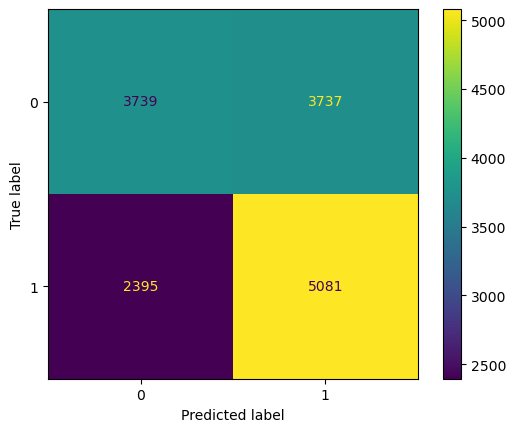

In [25]:
# Assuming `lr` is your trained model and `X_train`, `y_train` are your training features and labels
lr_preds = lr.predict(X_train)

# Create a confusion matrix display
disp = ConfusionMatrixDisplay.from_estimator(lr, X_train, y_train)





In [26]:
parameters = {
    'max_depth':[3, 4, 5, 6, 10, 15,20,30],
}
dtc = Pipeline([('CV',GridSearchCV(DecisionTreeClassifier(), parameters, cv = 5))])
dtc.fit(X_train, y_train)
dtc.named_steps['CV'].best_params_

{'max_depth': 30}

In [27]:
dt = DecisionTreeClassifier(max_depth=30).fit(X_train, y_train)
dt_scores = cross_val_score(dt, X_train, y_train, cv=10, scoring="f1")
np.mean(dt_scores)

0.9834310357064087

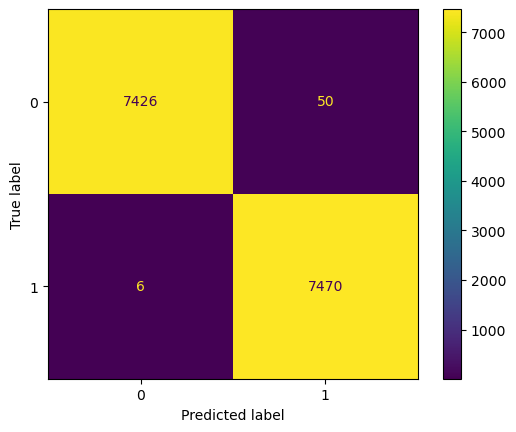

In [29]:
dt_preds = dt.predict(X_train)

# Create a confusion matrix display
disp = ConfusionMatrixDisplay.from_estimator(dt, X_train, y_train)


In [30]:
parameters = {
    'max_depth':[3, 6,12,15,20],
    'n_estimators':[10, 20,30]
}
clf = Pipeline([('CV',GridSearchCV(RandomForestClassifier(), parameters, cv = 5))])
clf.fit(X_train, y_train)
clf.named_steps['CV'].best_params_

{'max_depth': 20, 'n_estimators': 30}

In [31]:
rf = Pipeline([('rf', RandomForestClassifier(n_estimators = 10, max_depth = 20).fit(X_train, y_train))])
rf_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring="f1")
np.mean(rf_scores)

0.9922290395993036

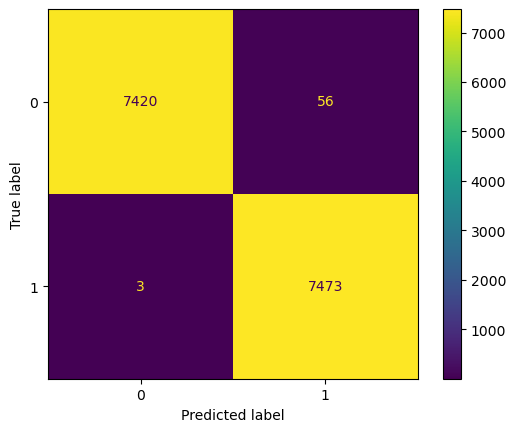

In [32]:
rf_preds = rf.predict(X_train)

# Create a confusion matrix display
disp = ConfusionMatrixDisplay.from_estimator(rf, X_train, y_train)


In [33]:
y_test.value_counts()

favorite
0    1871
1       9
Name: count, dtype: int64

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=30))
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('dt', DecisionTreeClassifier(max_depth=30))])

pipe.score(X_test, y_test)

0.9691489361702128

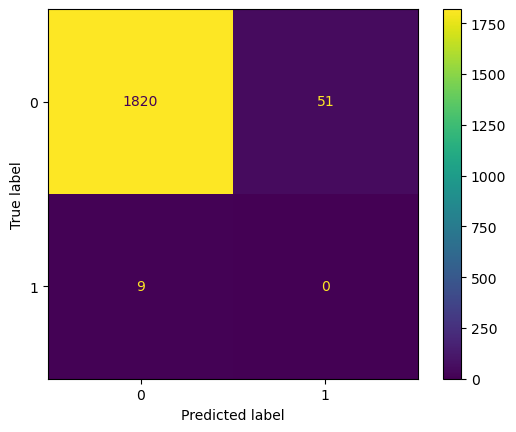

In [35]:
dt_preds = dt.predict(X_test)

# Create a confusion matrix display
disp = ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)


In [36]:
df = pd.read_csv('/Users/acthach/Desktop/Summer proj/spotify_topsongs.csv')

In [37]:
prob_preds = pipe.predict_proba(df.drop(['favorite','track_id'], axis=1))
threshold = 0.30 # define threshold here
preds = [1 if prob_preds[i][1]> threshold else 0 for i in range(len(prob_preds))]
df['prediction'] = preds

In [38]:
df['prediction'].value_counts()

prediction
0    9237
1     110
Name: count, dtype: int64

In [39]:
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy import oauth2

In [40]:
# Insert your Spotify username and the credentials that you obtained from spotify developer
cid = 'XXXXXXX'
secret = 'XXXXXXX'
redirect_uri='http://localhost:8888/callback'
username = 'XXXXXXX'

In [41]:
scope = 'user-top-read playlist-modify-private playlist-modify-public'
token = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

In [42]:
def create_playlist(sp, username, playlist_name, playlist_description):
    playlists = sp.user_playlist_create(username, playlist_name, description = playlist_description)

In [44]:
create_playlist(sp, username, 'ML playlist', 'This playlist was created using python!')

In [45]:
def fetch_playlists(sp, username):
    """
    Returns the user's playlists.
    """
        
    id = []
    name = []
    num_tracks = []
    
    # Make the API request
    playlists = sp.user_playlists(username)
    for playlist in playlists['items']:
        id.append(playlist['id'])
        name.append(playlist['name'])
        num_tracks.append(playlist['tracks']['total'])

    # Create the final df   
    df_playlists = pd.DataFrame({"id":id, "name": name, "#tracks": num_tracks})
    return df_playlists

In [51]:
fetch_playlists(sp,username).head()

,id,name,#tracks
0,4usmH7Xt6UkMHolfm0agzS,ML playlist,110
1,7gKgpqfvg6rCfMBqQ4g4Kc,NYSB,622
2,4OYaffRKqIakyCHDgi4ZfZ,Spring cleansing,11
3,5P3JMbnpcTQmxISGRGqWgp,Songs to remember me by,4
4,3gYdMz7T4pP6wzWi8klC7K,Body Dysmorphia,20


In [47]:
playlist_id = fetch_playlists(sp,username)['id'][0]

In [48]:
# Function to add selected songs to playlist
def enrich_playlist(sp, username, playlist_id, playlist_tracks):
    index = 0
    results = []
    
    while index < len(playlist_tracks):
        results += sp.user_playlist_add_tracks(username, playlist_id, tracks = playlist_tracks[index:index + 50])
        index += 50

In [49]:
list_track = df.loc[df['prediction']  == 1]['track_id']
enrich_playlist(sp, username, playlist_id, list_track)